## Prac 07.1

In this homework, you are going to use the code from ```TrafficSignsClassification``` notebook and create your own traffic sign classifier.

In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

### Step 1
Use the data from ```data/subset_homework``` folder and visualize some examples. How many images are there for each class?

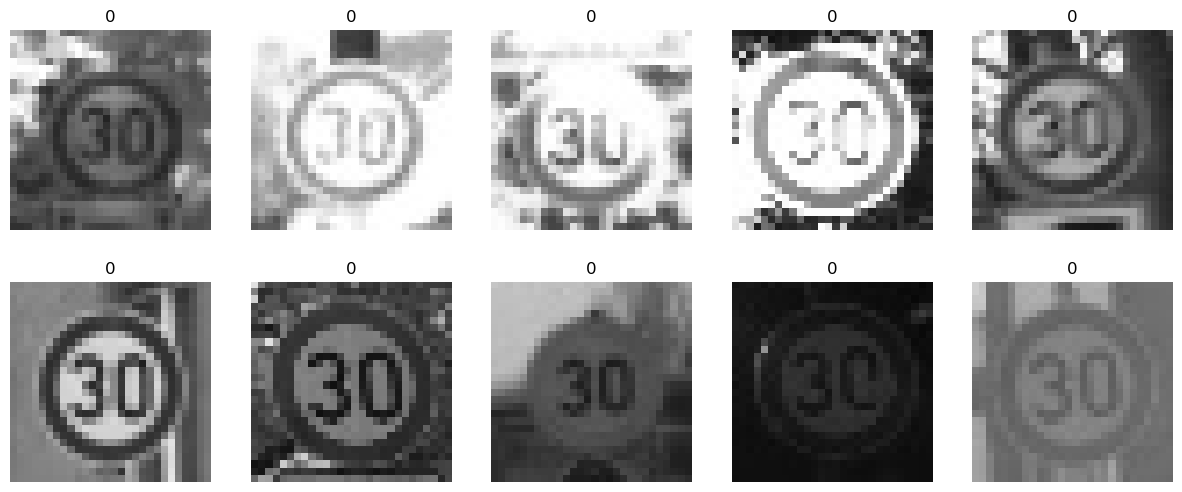

In [2]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

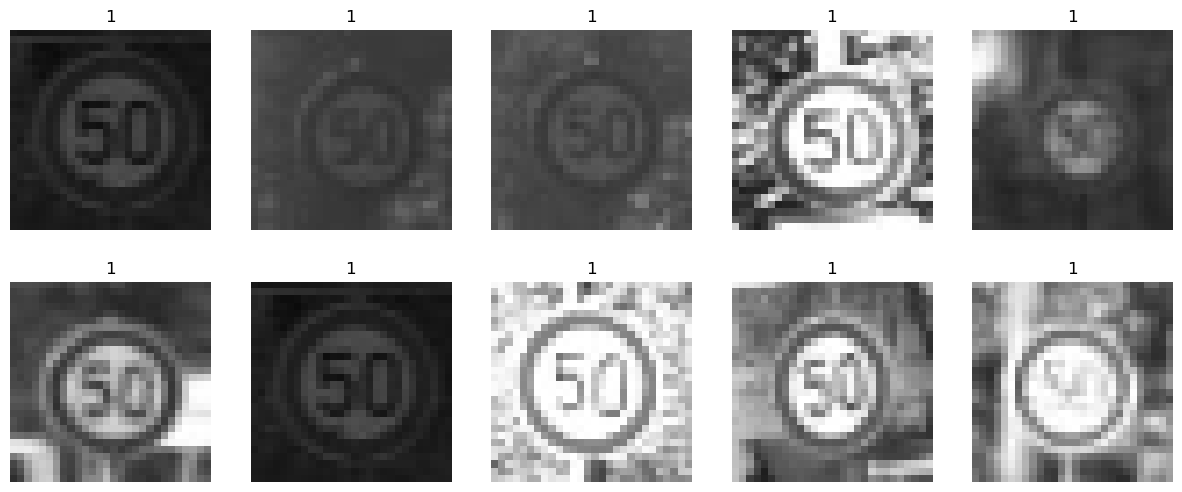

In [3]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


### Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?

In [5]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [6]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)

pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.5846102237701416


In [7]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.01179957389831543


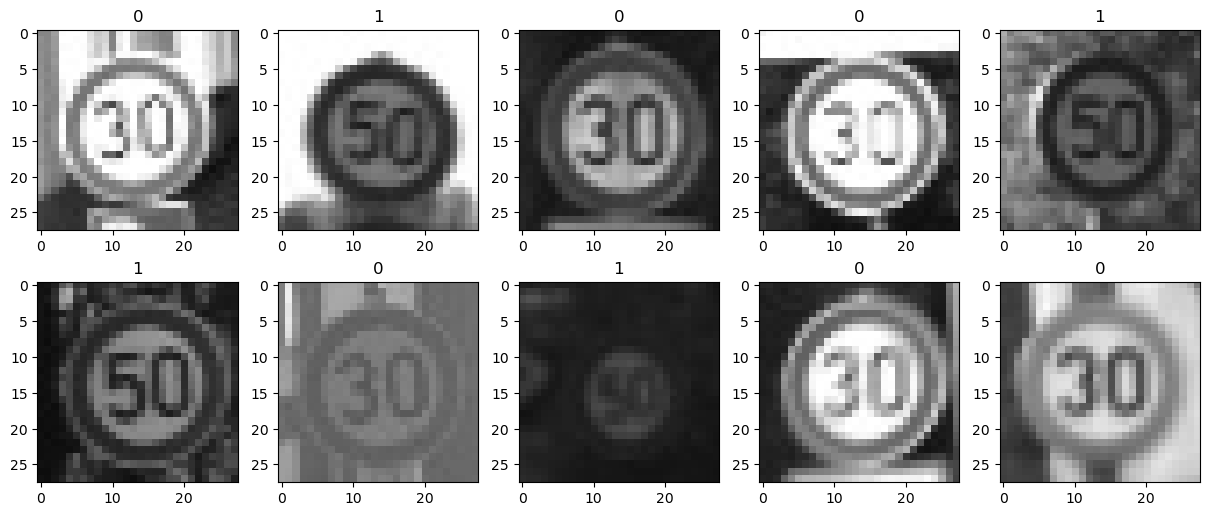

In [8]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [9]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [10]:
print("CPU devices:", tf.config.list_physical_devices('CPU'))
print("GPU devices:", tf.config.list_physical_devices('GPU'))

CPU devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
inputs_base = Input(shape=(784,), name='input_base')
outputs_base = Dense(1, activation="linear")(inputs_base)
model_base = Model(inputs_base, outputs_base)

model_base.compile(optimizer ='adam', 
                   loss = 'mean_squared_error', 
                   metrics=['accuracy'])

model_base.summary()

history_base = model_base.fit(pixels, labels, epochs=10, batch_size=32)

loss, accuracy = model_base.evaluate(pixels, labels)
print(f"\nТочність базової моделі: {accuracy*100:.2f}%")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_base (InputLayer)      [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
140/140 [==============================] - 1s 1ms/step - loss: 0.3012 - accuracy: 0.5438
Epoch 2/10
140/140 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.6474
Epoch 3/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1826 - accuracy: 0.7166
Epoch 4/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1588 - accuracy: 0.7718
Epoch 5/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1398 - accuracy: 0.8116
Epoch 6/10
140/140 [=====

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

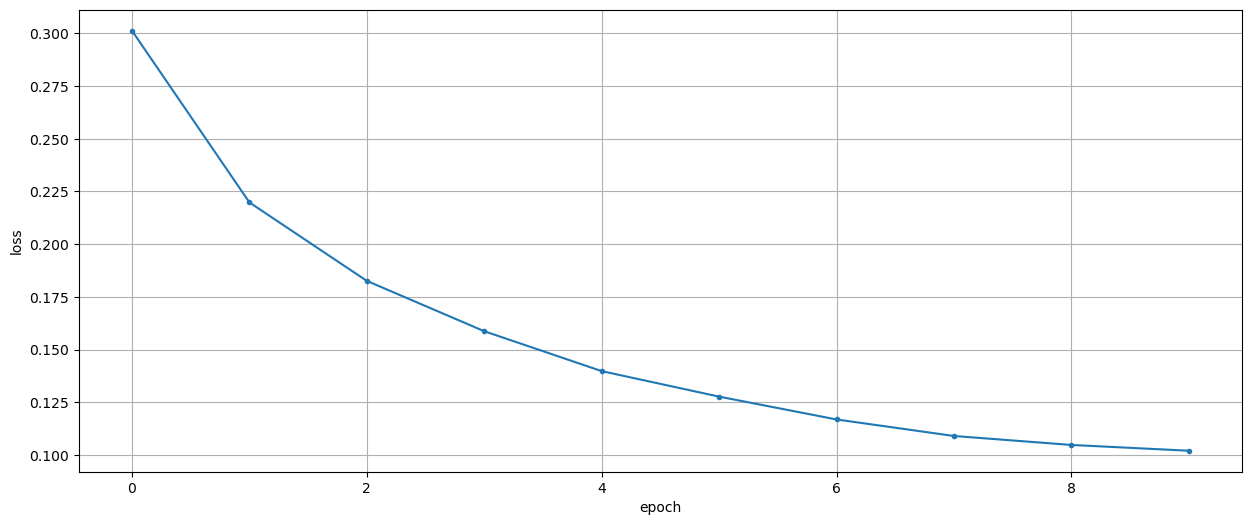

In [12]:
# Plot training history
h = history_base.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.41250327] [0.41250327]


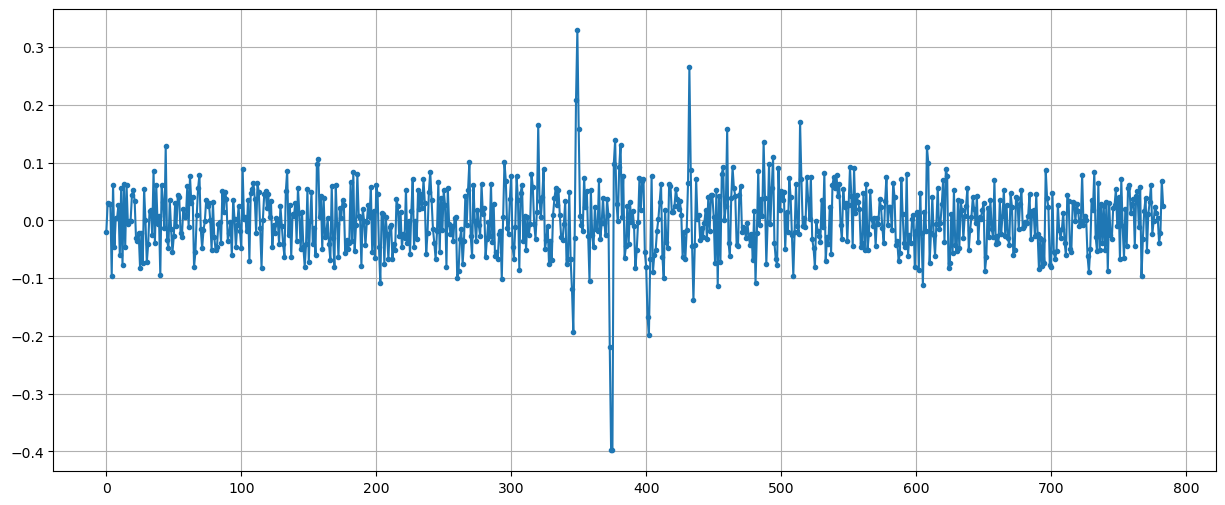

In [13]:
# Let's also have a looks at the learnt weights
plt.plot(model_base.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model_base.layers[1].weights[1].numpy(), model_base.layers[1].bias.numpy())

### Step 3
Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?

In [14]:
inputs = Input(shape=(784,), name='input_1')
x = Dense(10, activation="linear")(inputs)
outputs = Dense(1, activation="linear")(x) 
model = Model(inputs, outputs) 

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 7,861
Trainable params: 7,861
Non-trainable params: 0
_________________________________________________________________


In [15]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [16]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [17]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 [==============================] - 0s 1ms/step - loss: 0.3234
Epoch 2/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1901
Epoch 3/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1463
Epoch 4/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1205
Epoch 5/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1245
Epoch 6/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0981
Epoch 7/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0948
Epoch 8/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0948
Epoch 9/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0973
Epoch 10/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0889


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

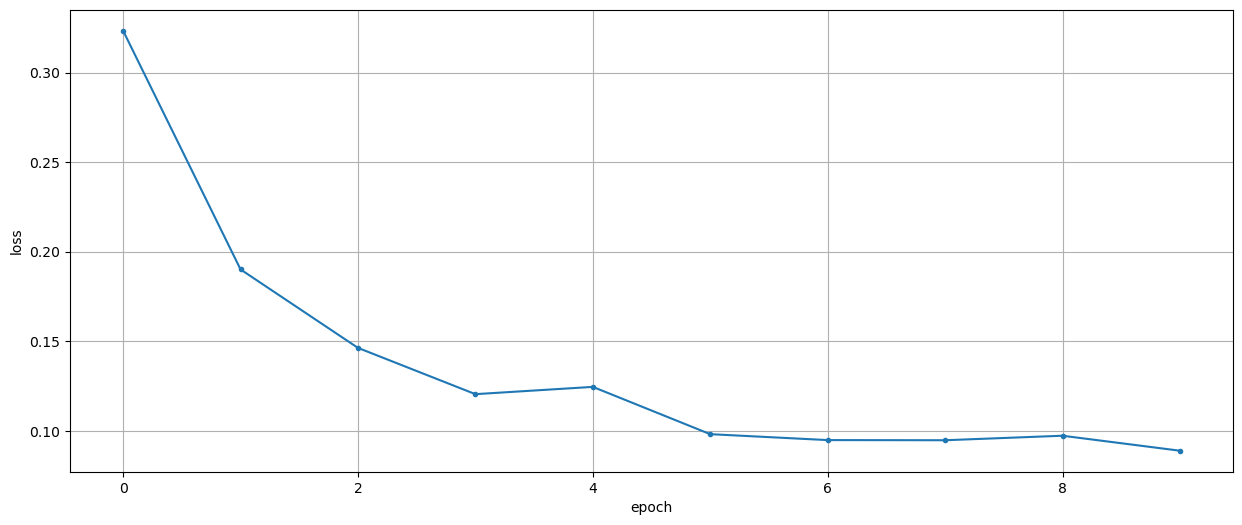

In [18]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[-0.122338   -0.1343232  -0.11930678 -0.12302024 -0.12215092  0.12090155
  0.12911303 -0.12241328 -0.10987022 -0.14221905] 
 [-0.122338   -0.1343232  -0.11930678 -0.12302024 -0.12215092  0.12090155
  0.12911303 -0.12241328 -0.10987022 -0.14221905]


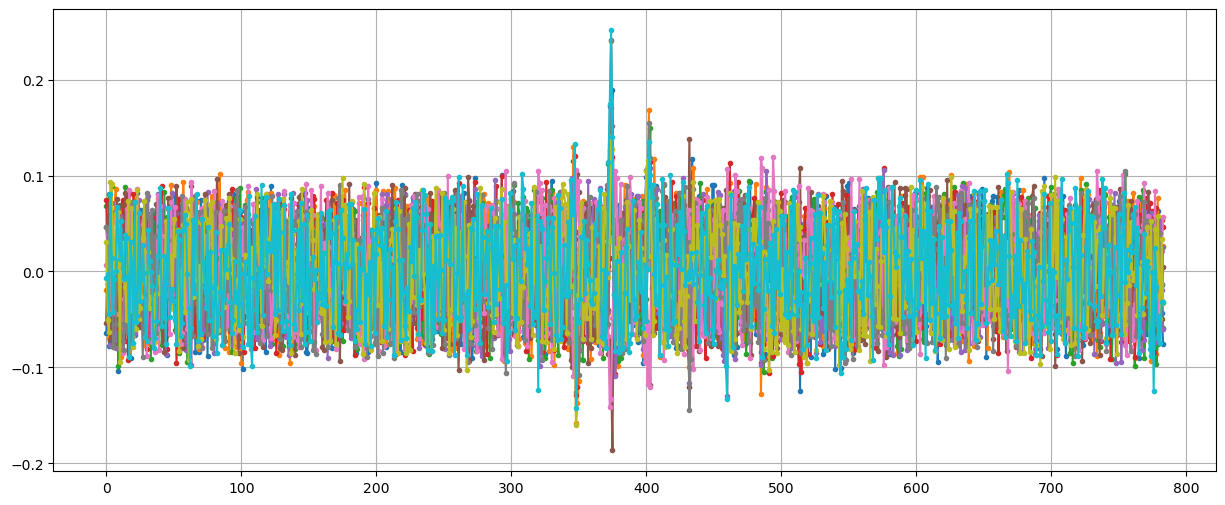

In [19]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), "\n", model.layers[1].bias.numpy())

In [20]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

[[-0.1252667]] 0


In [21]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

In [22]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9492170022371365


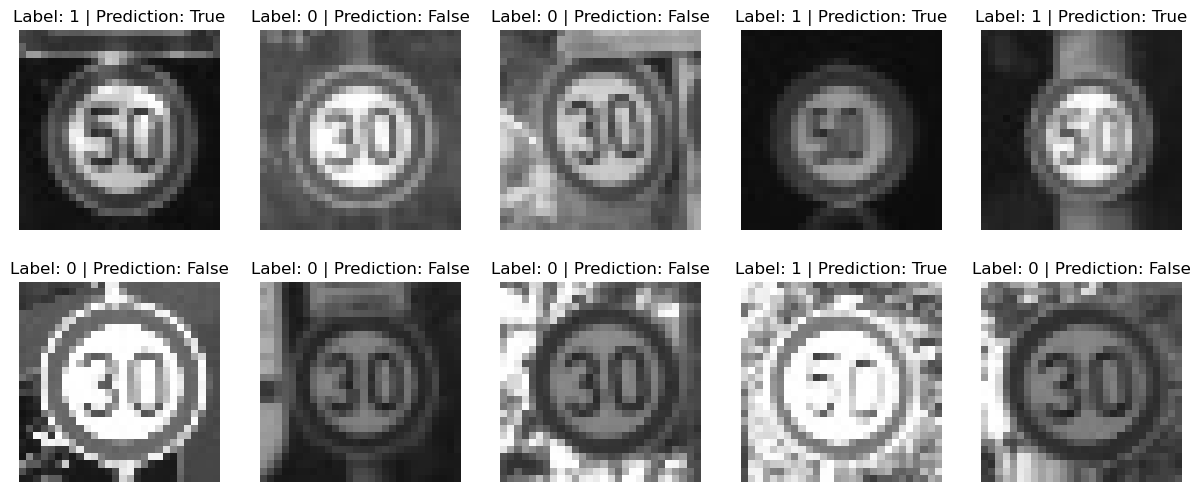

In [23]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

# Prac 07.2

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [24]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

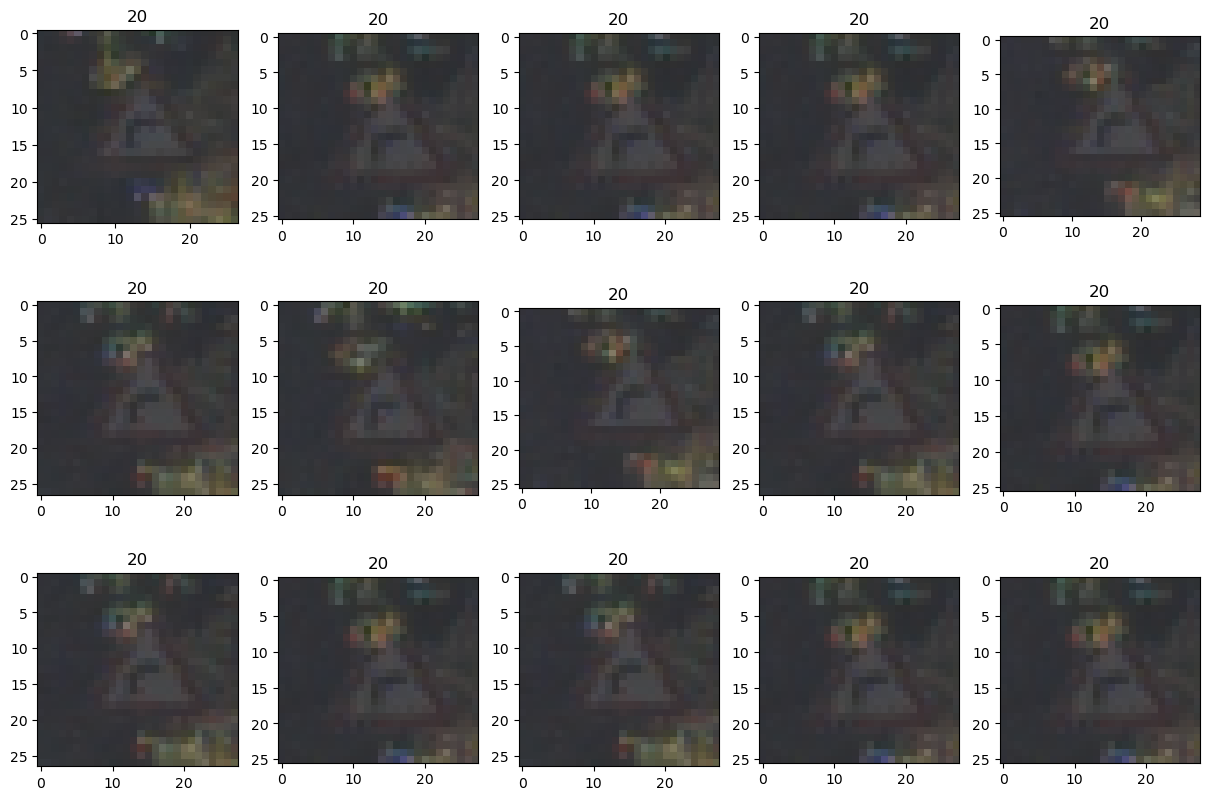

In [25]:
# Load the training labels
root = 'data/archive'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = 5

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [26]:
# Extract class identifiers
# Hint: Check the csv 
ids = data["ClassId"]

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

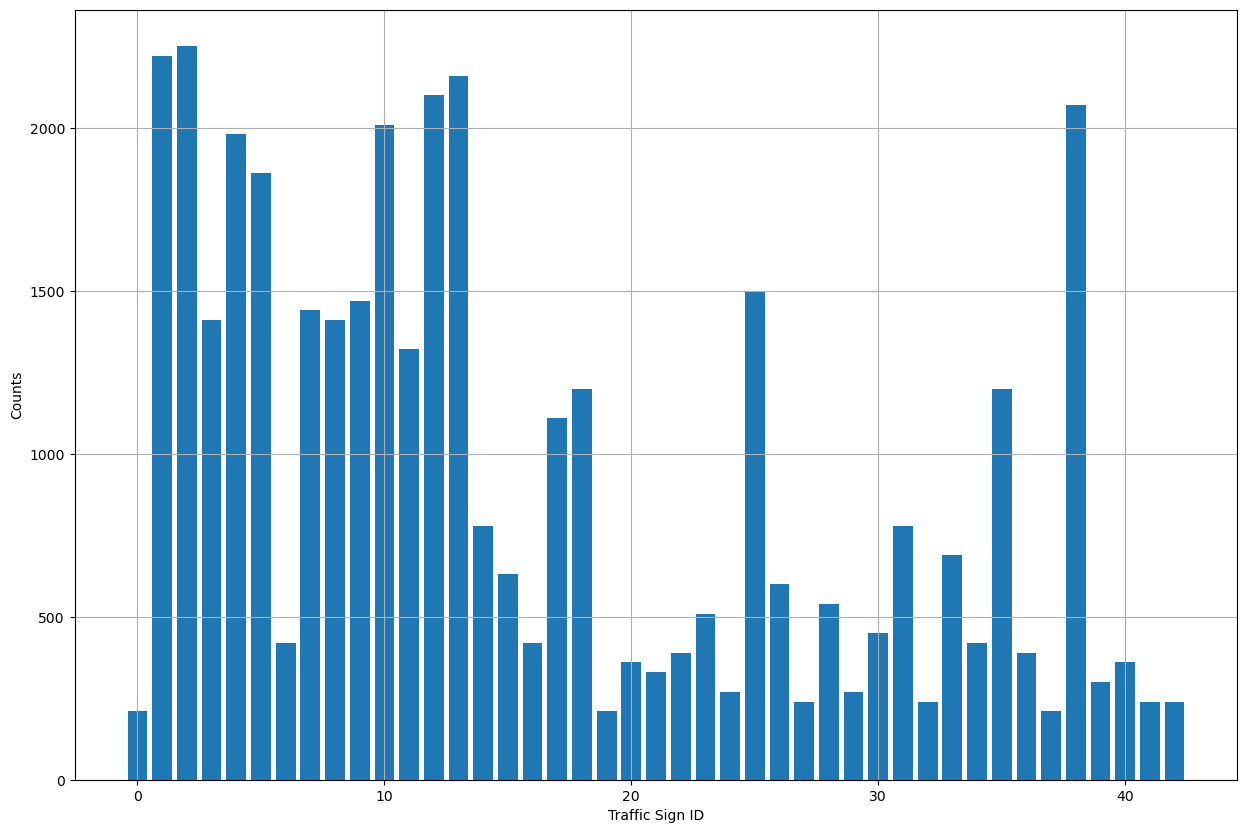

In [27]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?


Так, тому що є група класів, що переважають інші класи по кількості даних для навчання, сильно переважають.


* Are there any classes that are (significantly) over-represented or under-represeneted?


Так є наприклад клас "0" та клас "1"

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?


Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

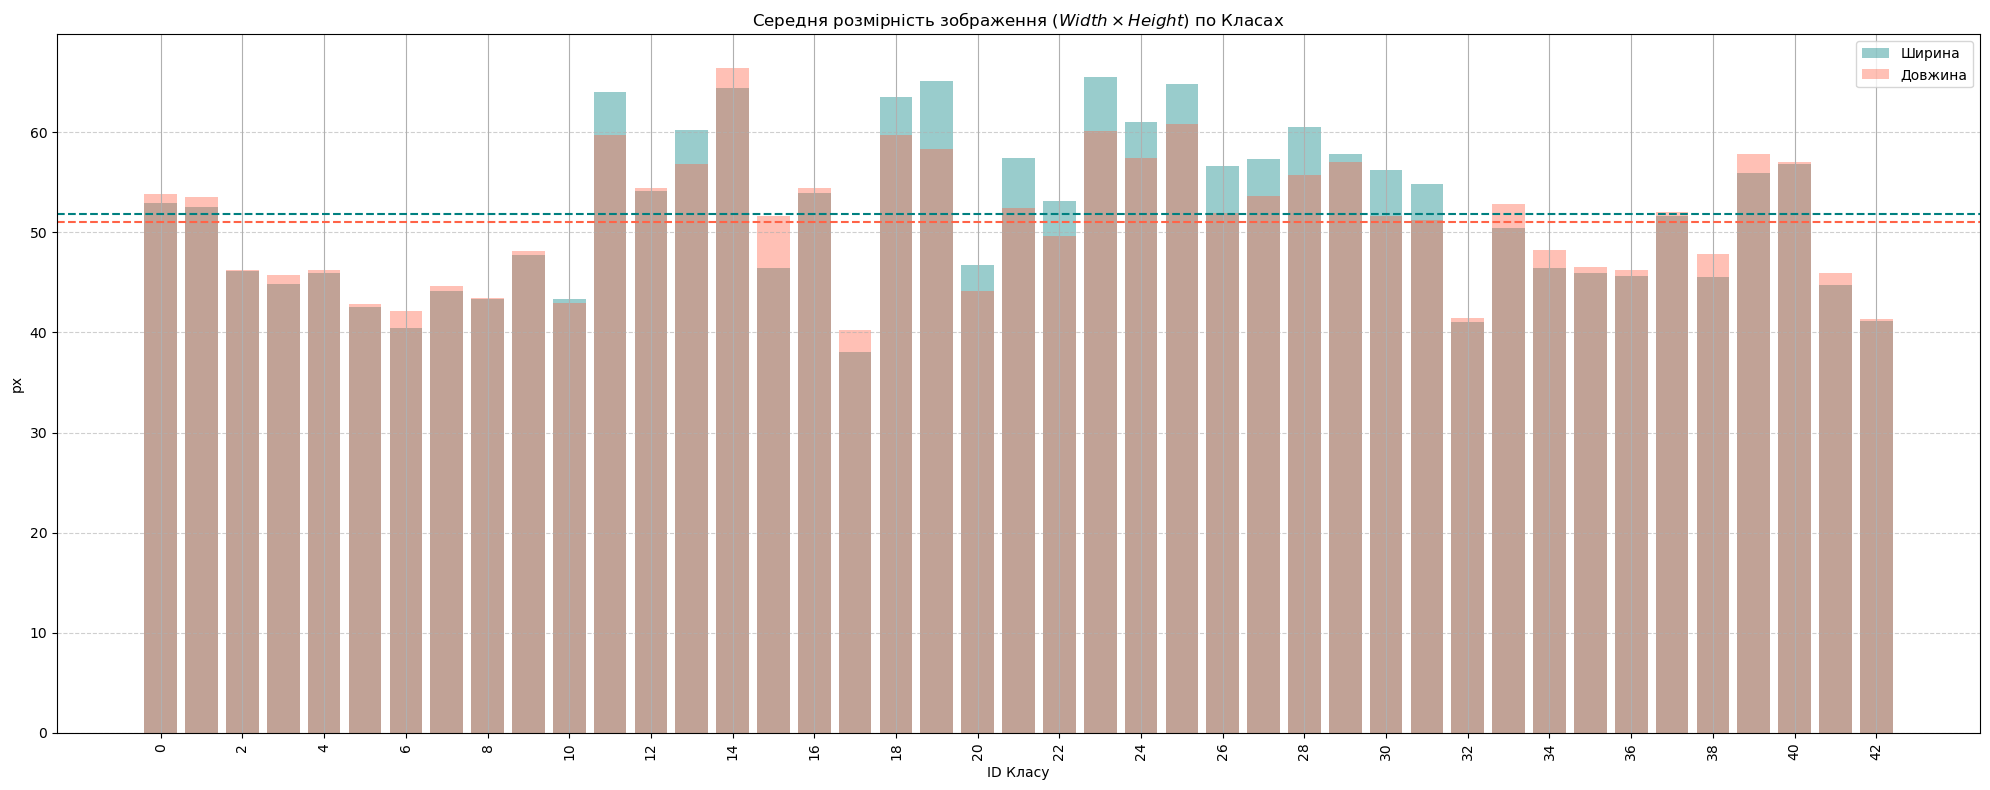

In [28]:
class_dimensions = data.groupby('ClassId')[['Width', 'Height']].mean()

plt.figure(figsize=(20, 8))

plt.bar(class_dimensions.index.astype(str), 
        class_dimensions['Width'], color='teal', 
        alpha=0.4, label="Ширина")
plt.axline([0, class_dimensions['Width'].mean()], 
           [2, class_dimensions['Width'].mean()], 
           color='teal', linestyle="--")
plt.title(fr'Середня розмірність зображення ($Width \times Height$) по Класах')
plt.xlabel('ID Класу')
plt.ylabel('px')
plt.xticks(ticks=class_dimensions.index.astype(str)[::2], 
            labels=class_dimensions.index.astype(int)[::2], 
            rotation=90)
plt.grid(True, linestyle='--', alpha=0.6, axis='y')

plt.bar(class_dimensions.index.astype(str), 
        class_dimensions['Height'], color='tomato', 
        alpha=0.4, label="Довжина")
plt.axline([0, class_dimensions['Height'].mean()], 
           [2, class_dimensions['Height'].mean()], 
           color='tomato', linestyle="--")


plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
data['FullPath'] = data['Path'].apply(lambda x: os.path.join(root, x))

def get_roi_brightness(row):
    img = cv2.imread(row['FullPath'])
    if img is None:
        return np.nan
    
    roi = img[row['Roi.Y1']:row['Roi.Y2'], 
                row['Roi.X1']:row['Roi.X2']]
    
    if roi.size == 0:
        return np.nan
    
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    return np.mean(gray_roi)

data['Brightness'] = data.apply(get_roi_brightness, axis=1)

df_clean = data.dropna(subset=['Brightness'])

class_brightness = df_clean.groupby('ClassId')['Brightness'].mean().reset_index()

class_brightness_sorted = class_brightness.sort_values(by='Brightness')

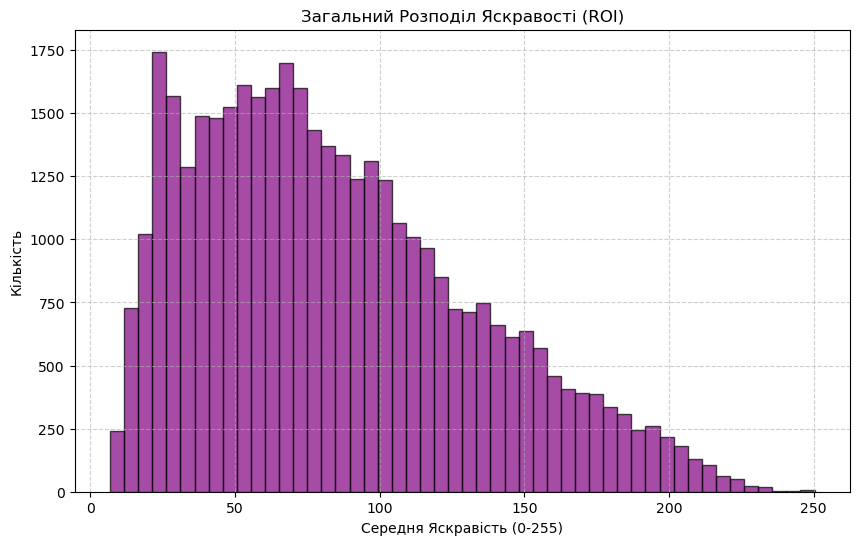

In [30]:
# 2a. Загальний розподіл яскравості (Matplotlib)
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Brightness'], bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title('Загальний Розподіл Яскравості (ROI)')
plt.xlabel('Середня Яскравість (0-255)')
plt.ylabel('Кількість')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


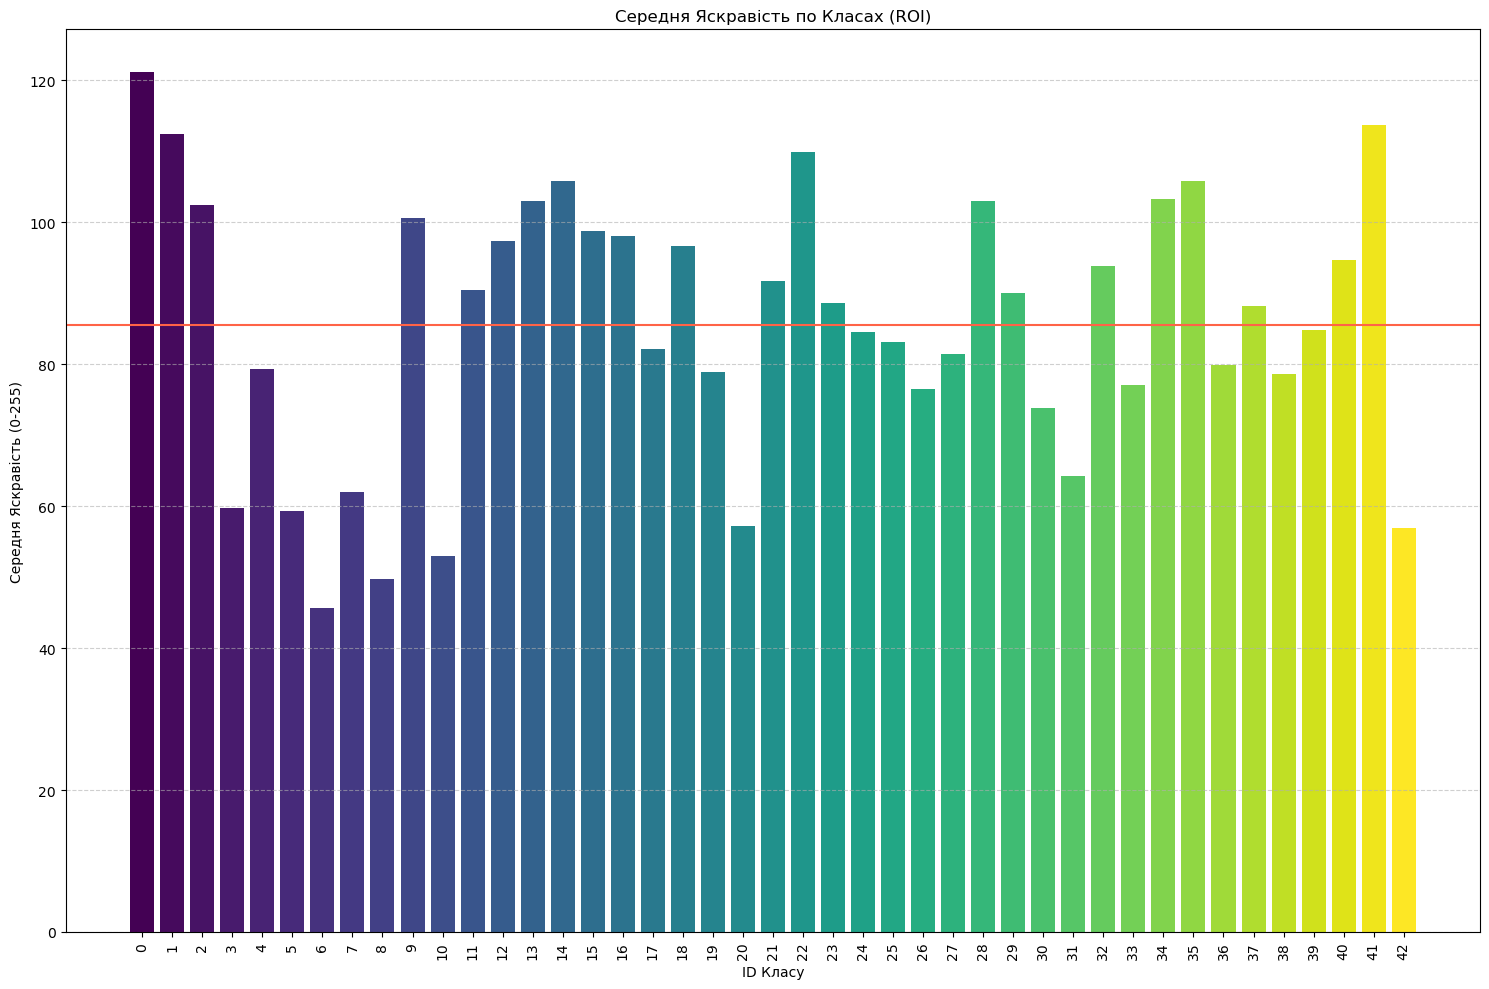

In [31]:
colors = plt.cm.viridis(np.linspace(0, 1, len(class_brightness_sorted)))

data_sorted = class_brightness_sorted.set_index('ClassId').loc[class_brightness['ClassId']]

plt.bar(data_sorted.index.astype(str), data_sorted['Brightness'], color=colors)
plt.axline([0, data_sorted['Brightness'].mean()], [1, data_sorted['Brightness'].mean()], color="tomato")
plt.title('Середня Яскравість по Класах (ROI)')
plt.xlabel('ID Класу')
plt.ylabel('Середня Яскравість (0-255)')
plt.xticks(ticks=data_sorted.index.astype(str), labels=data_sorted.index.astype(int), rotation=90)
plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.tight_layout()
plt.show()